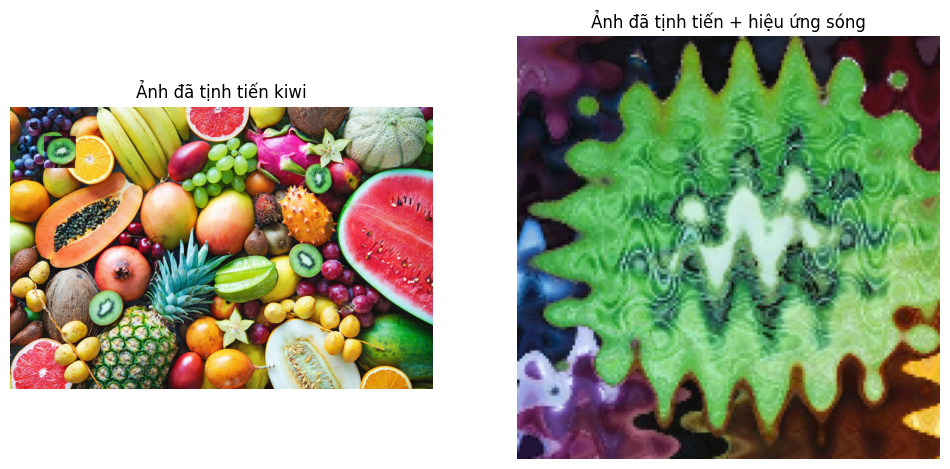

In [17]:
#tịnh tiến sang phải 50 pixel, xuống dưới 30 pixel
#hiệu ứng sóng bằng map coordintes với hàm sin

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates

# Đọc ảnh
data = iio.imread('Exercise/colorful-ripe-tropical-fruits.jpg')
h, w, c = data.shape

# ===== Tịnh tiến vùng kiwi =====
y1, y2 = 120, 280
x1, x2 = 120, 280
kiwi = data[y1:y2, x1:x2]

dx = 50
dy = 30
x1_new = x1 + dx
x2_new = x2 + dx
y1_new = y1 + dy
y2_new = y2 + dy

# Chèn vùng kiwi vào vị trí mới (chú ý không vượt biên)
data_shifted = data.copy()
if y2_new < h and x2_new < w:
    data_shifted[y1_new:y2_new, x1_new:x2_new] = kiwi
else:
    print("❌ Vùng tịnh tiến vượt kích thước ảnh!")

# ===== Tạo hiệu ứng sóng =====
Hk = y2_new - y1_new
Wk = x2_new - x1_new
Yk, Xk = np.meshgrid(np.arange(Hk), np.arange(Wk), indexing='ij')

amplitude = 10
frequency = 0.05

Xk_new = Xk + amplitude * np.sin(2 * np.pi * Yk * frequency)
Yk_new = Yk + amplitude * np.sin(2 * np.pi * Xk * frequency)

Xk_new = np.clip(Xk_new, 0, Wk - 1)
Yk_new = np.clip(Yk_new, 0, Hk - 1)

kiwi_wave = np.zeros_like(kiwi)
for i in range(c):
    kiwi_wave[..., i] = map_coordinates(kiwi[..., i], [Yk_new, Xk_new], order=1, mode='reflect')


data_wave = data_shifted.copy()
data_wave[y1_new:y2_new, x1_new:x2_new] = kiwi_wave

# ===== Hiển thị kết quả =====
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(data_shifted)
plt.title("Ảnh đã tịnh tiến kiwi")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kiwi_wave)
plt.title("Ảnh đã tịnh tiến + hiệu ứng sóng")
plt.axis('off')

plt.show()


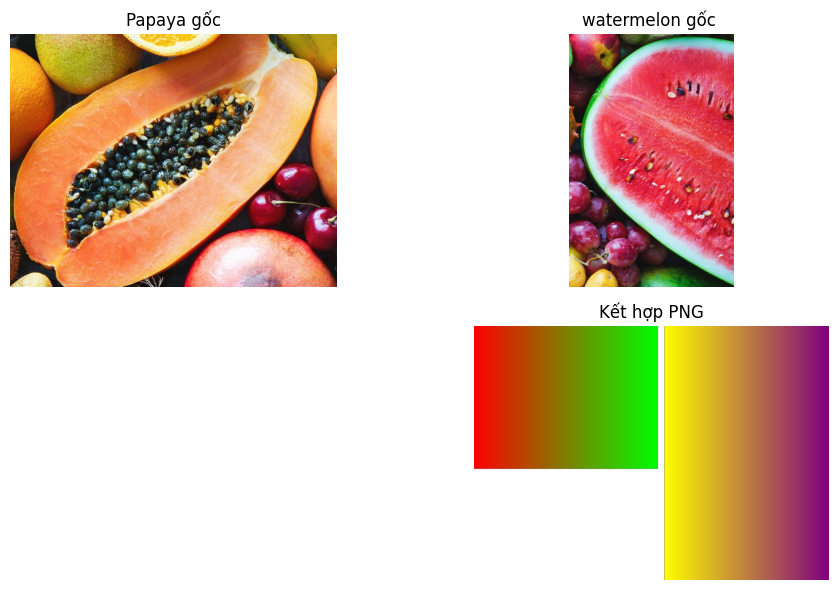

In [33]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from PIL import Image

# Đọc ảnh
data = iio.imread('Exercise/colorful-ripe-tropical-fruits.jpg')

# ===== TẠO GRADIENT PAPAYA: đỏ -> xanh lá =====
bmg1 = data[350:800, 120:700]
h1, w1, _ = bmg1.shape
gradient1 = np.linspace(0, 1, w1)

red = np.array([255, 0, 0])
green = np.array([0, 255, 0])

grad_colors1 = (1 - gradient1)[:, None] * red + gradient1[:, None] * green
grad_colors1 = np.clip(grad_colors1, 0, 255).astype(np.uint8)

papaya_gradient = bmg1.copy()
for i in range(w1):
    papaya_gradient[:, i, :] = grad_colors1[i]

# Thêm alpha
papaya_rgba = np.concatenate([papaya_gradient, 255 * np.ones((h1, w1, 1), dtype=np.uint8)], axis=2)

# ===== TẠO GRADIENT WATERMELON: vàng -> tím =====
bmg2 = data[300:1100, 1600:2500]
h2, w2, _ = bmg2.shape
gradient2 = np.linspace(0, 1, w2)

yellow = np.array([255, 255, 0])
purple = np.array([128, 0, 128])

grad_colors2 = (1 - gradient2)[:, None] * yellow + gradient2[:, None] * purple
grad_colors2 = np.clip(grad_colors2, 0, 255).astype(np.uint8)

watermelon_gradient = bmg2.copy()
for i in range(w2):
    watermelon_gradient[:, i, :] = grad_colors2[i]

# Thêm alpha
watermelon_rgba = np.concatenate([watermelon_gradient, 255 * np.ones((h2, w2, 1), dtype=np.uint8)], axis=2)

# ===== GHÉP ẢNH =====
pp_img = Image.fromarray(papaya_rgba, "RGBA")
wm_img = Image.fromarray(watermelon_rgba, "RGBA")

canvas_width = pp_img.width + wm_img.width + 20
canvas_height = max(pp_img.height, wm_img.height)
background = Image.new("RGBA", (canvas_width, canvas_height), (0, 0, 0, 0))

background.paste(pp_img, (0, 0))
background.paste(wm_img, (pp_img.width + 20, 0))

# Lưu PNG
output_file = "output/fruit_combo.png"
background.save(output_file)

# ===== HIỂN THỊ =====
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(bmg1)
plt.title("Papaya gốc")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(bmg2)
plt.title("watermelon gốc ")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(background)
plt.title("Kết hợp PNG")
plt.axis('off')

plt.tight_layout()
plt.show()


(605, 1021, 3)
(605, 1021, 3)


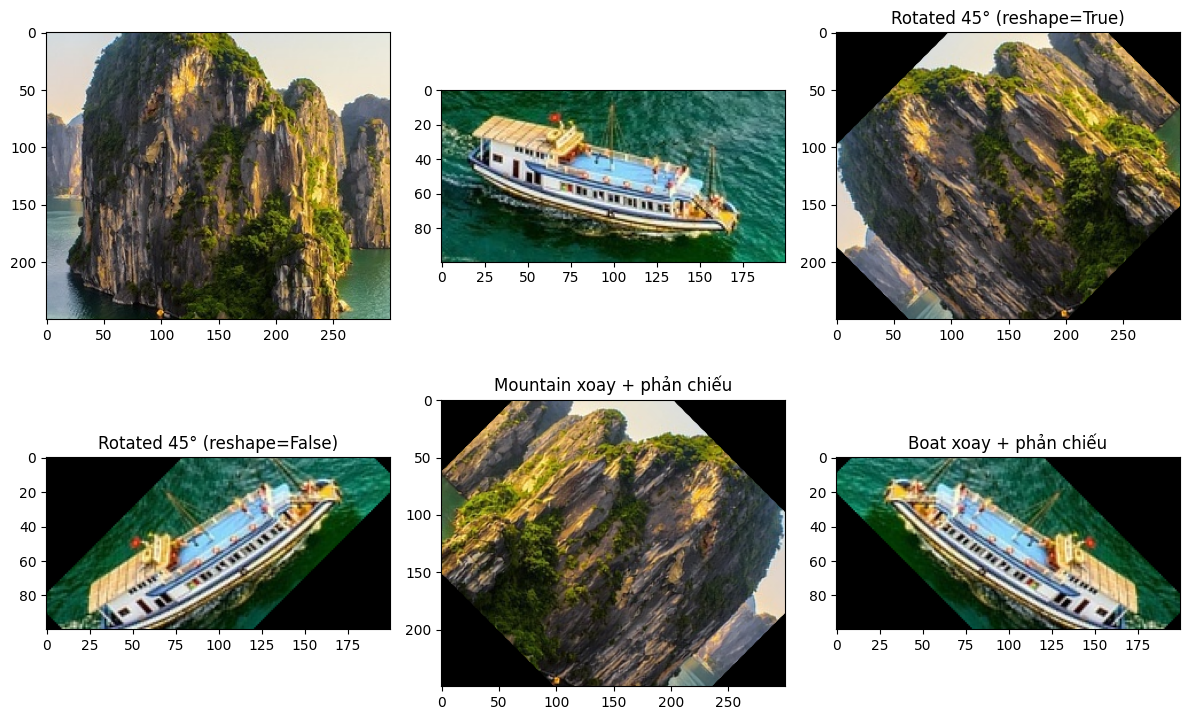

In [1]:
#Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
#Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

data = iio.imread('Exercise/quang_ninh.jpg')
#[y1:y2 , x1:x2]
bmg1 = data[50:300, 400:700]
print(data.shape)

bmg2 = data[450:550, 480:680]
print(data.shape)

rotated1 = nd.rotate(bmg1, 45, reshape=False)
rotated2 = nd.rotate(bmg2, 45, reshape=False)

mirrored1 = rotated1[:, ::-1, :]
mirrored2 = rotated2[:, ::-1, :]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
iio.imsave('output/mountain.jpg', bmg1)
plt.imshow(bmg1)

plt.subplot(2, 3, 2)
iio.imsave('output/boat.jpg', bmg2)
plt.imshow(bmg2)

plt.subplot(2, 3, 3)
plt.imshow(rotated1)
plt.title("Rotated 45° (reshape=True)")

plt.subplot(2, 3, 4)
plt.imshow(rotated2)
plt.title("Rotated 45° (reshape=False)")

plt.subplot(2, 3, 5)
plt.imshow(mirrored1)
plt.title("Mountain xoay + phản chiếu")

plt.subplot(2, 3, 6)
plt.imshow(mirrored2)
plt.title("Boat xoay + phản chiếu")

plt.tight_layout()
plt.show()

(348, 600, 3)


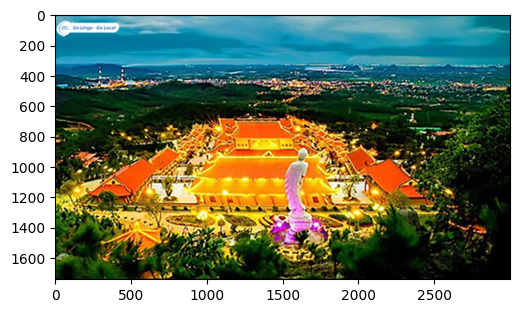

In [3]:
#Phóng to ngôi chùa lên 5 lần.
#Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd 
from scipy.ndimage import zoom, map_coordinates

data = iio.imread('Exercise/pagoda.jpg')
print (data.shape)

phongto = nd.zoom(data, (5, 5, 1)) 

h, w, c = phongto.shape
X, Y = np.meshgrid(np.arange(w), np.arange(h))

# Biến đổi "uốn cong" - hiệu ứng sóng dọc
amplitude = 30
frequency = 0.002

X_warped = X + amplitude * np.sin(2 * np.pi * Y * frequency)
Y_warped = Y

X_warped = np.clip(X_warped, 0, w - 1)
Y_warped = np.clip(Y_warped, 0, h - 1)

warped_img = np.zeros_like(phongto)

for i in range(c):
    warped_img[..., i] = map_coordinates(phongto[..., i], [Y_warped, X_warped], order=1, mode='reflect')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
iio.imsave('output/phongtochua.jpg', phongto)
plt.imshow(phongto)

plt.subplot(1, 2, 1)
iio.imsave('output/warping_chua.jpg', warped_img)
plt.imshow(warped_img)

plt.tight_layout()
plt.show()

Chọn 1 ảnh trong số sau:
1. fruit.jpg
2. pagoda.jpg
3. quang_ninh.jpg
Đã chọn ảnh: pagoda.jpg, kích thước: (348, 600, 3)

Menu thao tác:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map (biến dạng ngẫu nhiên)
G - Làm mờ Gaussian
S - Biến đổi sóng


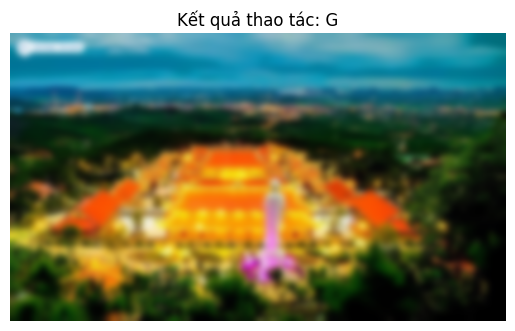

In [ ]:
#Làm mờ Gaussian (hỏi giá trị sigma).
#Biến đổi sóng (hỏi biên độ sóng).

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import os

image_list = ['fruit.jpg', 'pagoda.jpg', 'quang_ninh.jpg']
print("Chọn 1 ảnh trong số sau:")
for i, name in enumerate(image_list, 1):
    print(f"{i}. {name}")

choice = int(input("Nhập số ảnh (1-3): "))
filename = image_list[choice - 1]
img_path = os.path.join('Exercise', filename)

img = iio.imread(img_path)
print(f"Đã chọn ảnh: {filename}, kích thước: {img.shape}")

print("\nMenu thao tác:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map (biến dạng ngẫu nhiên)")
print("G - Làm mờ Gaussian")
print("S - Biến đổi sóng")

action = input("Nhập thao tác bạn muốn thực hiện (T/X/P/H/C/G/S): ").upper()

result = None

if action == 'T': 
    result = nd.shift(img, shift=(30, 50, 0))  

elif action == 'X': 
    angle = float(input("Nhập góc xoay (độ): "))
    result = nd.rotate(img, angle, reshape=False)

elif action == 'P': 
    scale = float(input("Nhập hệ số phóng to (ví dụ: 2): "))
    result = nd.zoom(img, zoom=(scale, scale, 1))

elif action == 'H': 
    scale = float(input("Nhập hệ số thu nhỏ (ví dụ: 0.5): "))
    result = nd.zoom(img, zoom=(scale, scale, 1))

elif action == 'C': 
    V, H = img.shape[:2]
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.rand(*M.shape) - d
    mp = (M + q).astype(int)
    mp = np.clip(mp, 0, np.array([[V-1], [H-1]])) 
    result = img[mp[0], mp[1]]

elif action == 'G':
    sigma = float(input("Nhập giá trị sigma (độ mờ): "))
    result = nd.gaussian_filter(img, sigma=(sigma, sigma, 0))

elif action == 'S':
    amp = float(input("Nhập biên độ sóng: "))
    freq = 0.02  # bạn có thể cho nhập nếu muốn
    V, H = img.shape[:2]
    X, Y = np.meshgrid(np.arange(H), np.arange(V))
    X_new = X + amp * np.sin(2 * np.pi * Y * freq)
    Y_new = Y
    X_new = np.clip(X_new, 0, H - 1)
    Y_new = np.clip(Y_new, 0, V - 1)
    result = np.zeros_like(img)
    for i in range(img.shape[2]):
        result[..., i] = nd.map_coordinates(img[..., i], [Y_new, X_new], order=1, mode='reflect')

else:
    print("❌ Thao tác không hợp lệ.")
    exit()

plt.imshow(result)
plt.title(f"Kết quả thao tác: {action}")
plt.axis('off')
plt.show()
